# K-Means

### Detail Algorithm

1. select temperature center point. (nomally select one of sample data)
2. caculate distance from center each sample
3. update center point that close samples.
4. repeat 1~4 againg calculate and update center poting until no change sample category

### Import Package

In [32]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### 1. Make Data

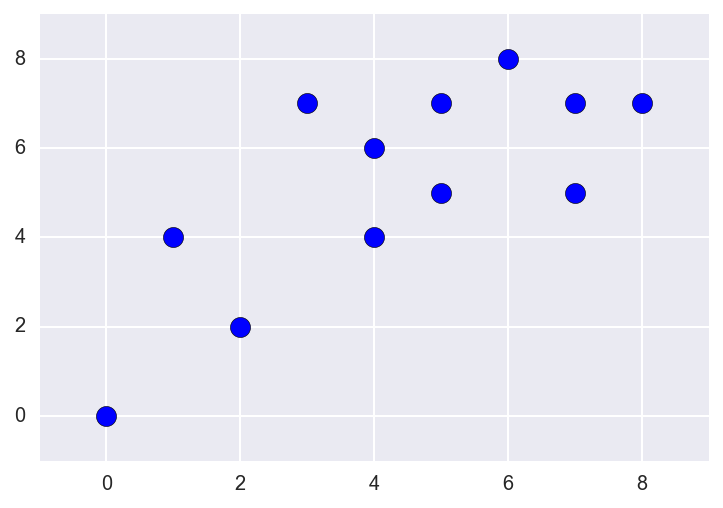

In [33]:
X = np.array([[7, 5],[5, 7],[7, 7],[4, 4],[4, 6],[1, 4],[0, 0],[2, 2],[8, 7],[6, 8],[5, 5],[3, 7]], dtype=float)
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

### 2. Make KMeans Model
- moving center poting until no change category data

In [34]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)

In [35]:
# make kmeans dateframe
def kmeans_df(c0, c1):
    df = pd.DataFrame(np.hstack([X, 
                                np.linalg.norm(X - c0, axis=1)[:, np.newaxis], 
                                np.linalg.norm(X - c1, axis=1)[:, np.newaxis], 
                                model.labels_[:, np.newaxis]]),
                    columns=["x0", "x1", "d0", "d1", "c"])
    return df

##### (1) max_iter = 1

[ 6.6  6.8] [ 2.71428571  4.        ]


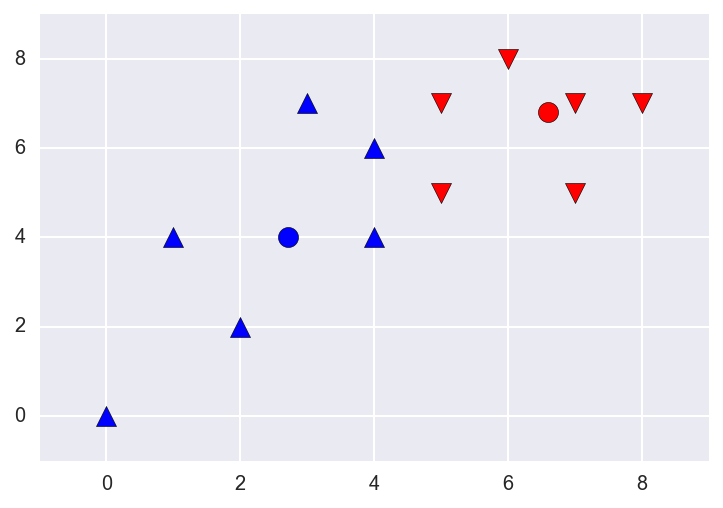

In [36]:
c0, c1 = model.cluster_centers_
print(c0, c1) # center point
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
plt.show()
# kmeans_df(c0, c1)

##### (2) max_iter = 2

[ 1.  2.] [ 5.44444444  6.22222222]


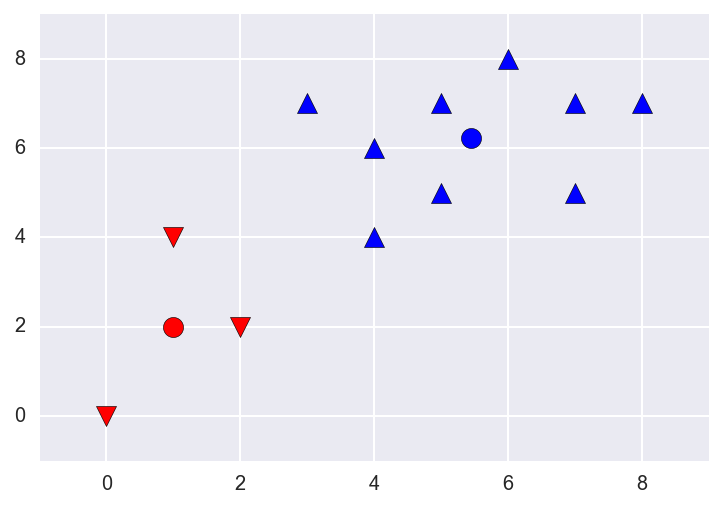

In [37]:
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=2, random_state=0).fit(X)
c0, c1 = model.cluster_centers_
print(c0, c1) # center point
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
plt.show()
# kmeans_df(c0, c1)

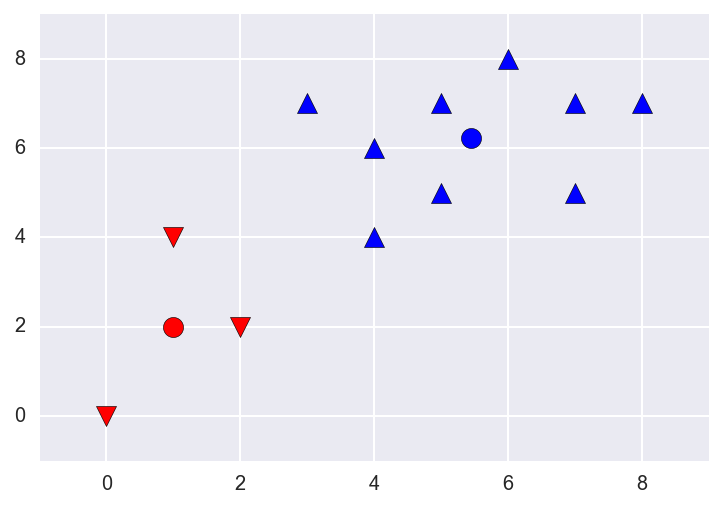

3

In [38]:
# end of clustering
model = KMeans(n_clusters=2, init="random", random_state=0).fit(X)
c0, c1 = model.cluster_centers_
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
plt.show()
model.n_iter_ # the number of n_iter

### 3. Iris Example

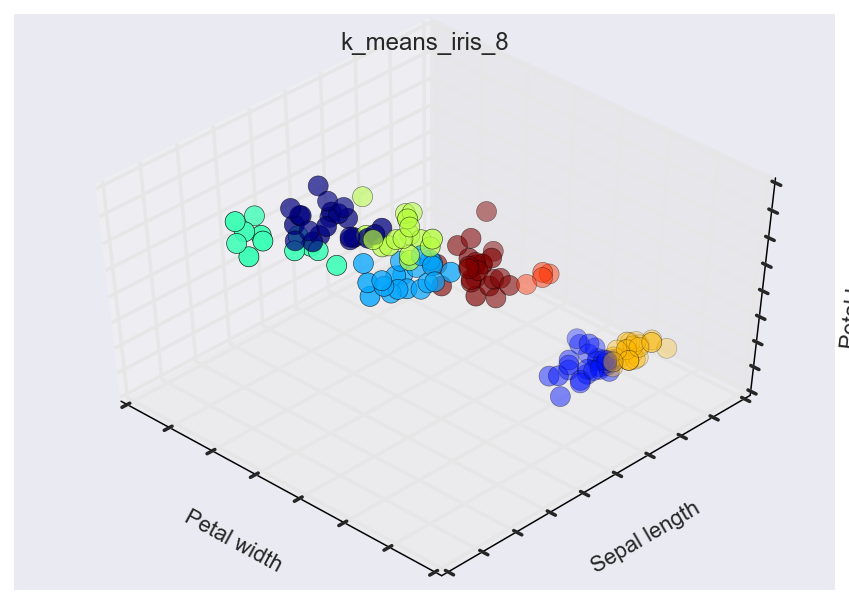

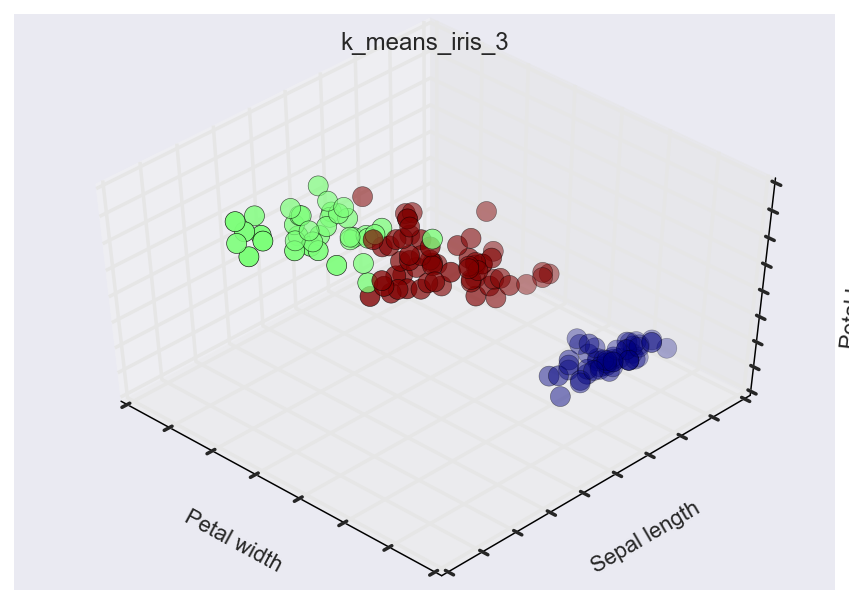

In [39]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8)}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum)
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), s=100, cmap=mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.title(name)
    fignum = fignum + 1

plt.show()

### 4. Digit Image

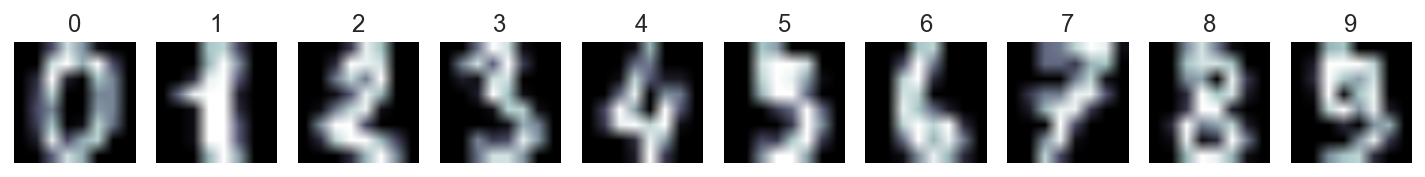

In [40]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

def print_digits(images, labels):
    f = plt.figure(figsize=(10,2))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.table
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

print_digits(digits.images, range(10))

In [41]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = \
    train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

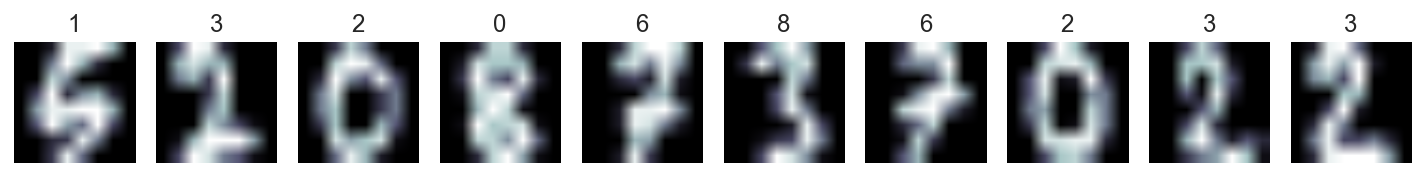

In [42]:
# KMeans init default is k-means++. k-means++ is one of the method that select two or more center point
clf = KMeans(init="k-means++", n_clusters=10, random_state=42)
clf.fit(X_train)
print_digits(images_train, clf.labels_)

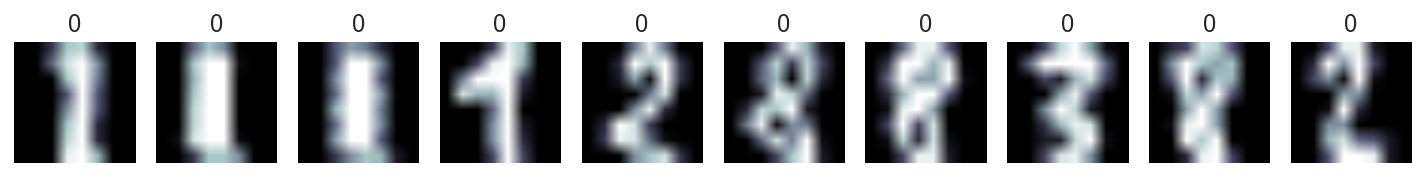

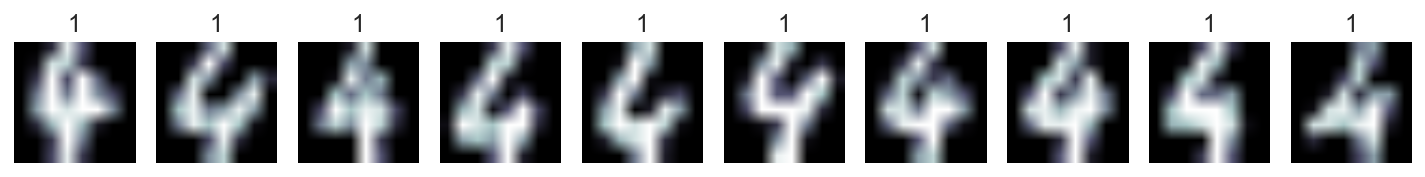

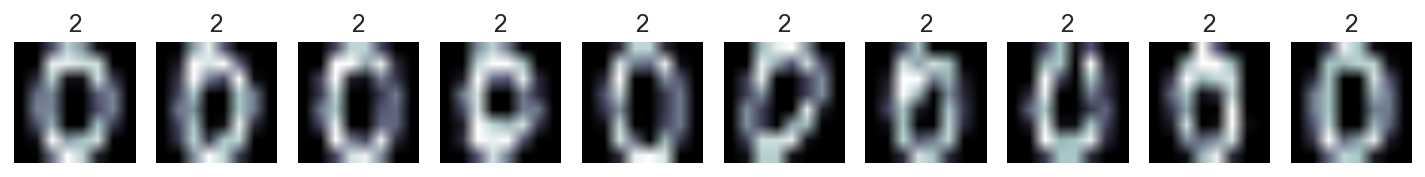

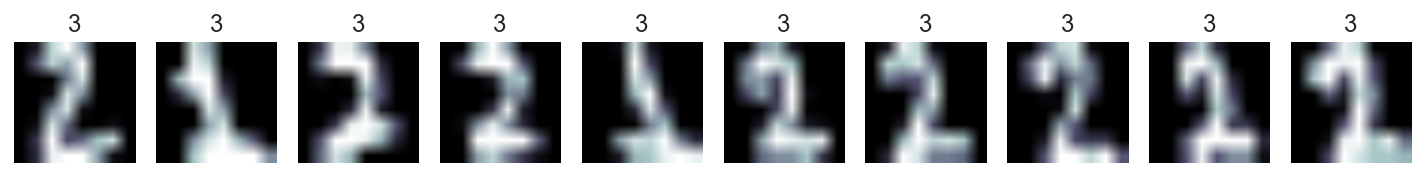

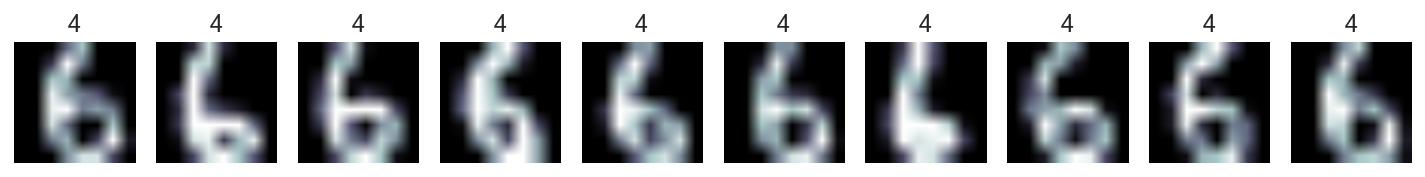

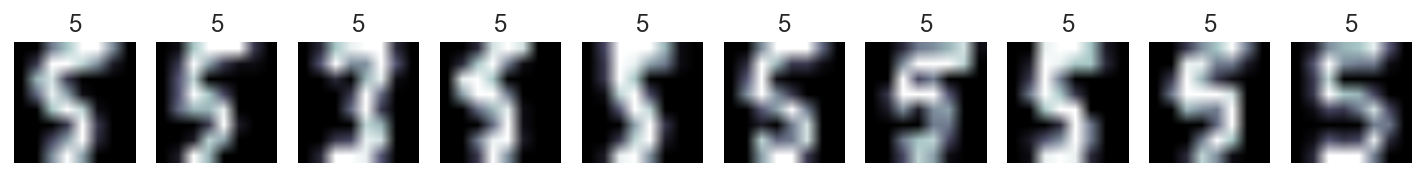

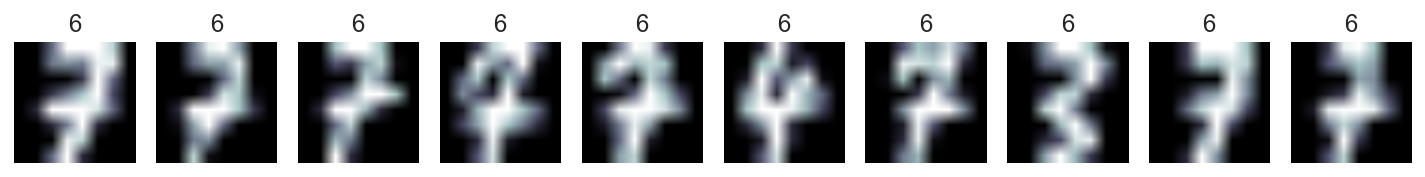

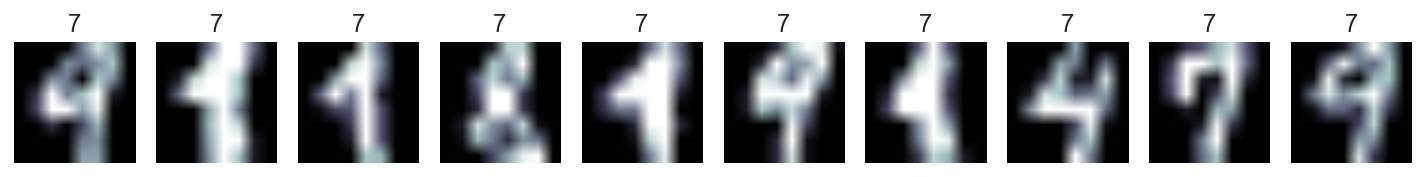

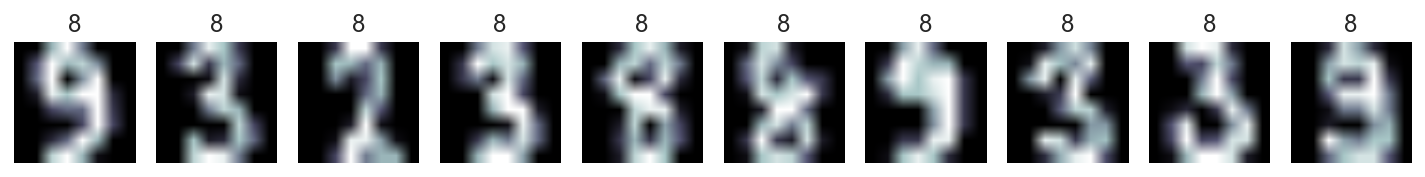

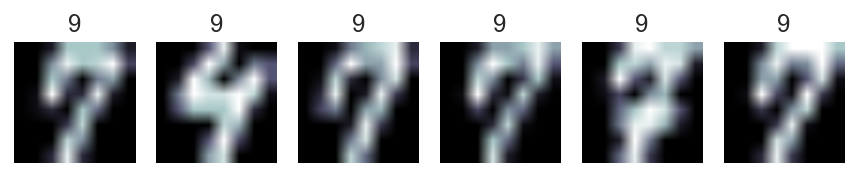

In [44]:
y_pred = clf.predict(X_test)
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    print_digits(images, y_pred)
for i in range(10):
    print_cluster(images_test, y_pred, i)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [20,  0,  0,  7,  0,  0,  0, 10,  0,  0],
       [ 5,  0,  0, 31,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  1,  0,  1,  4,  0, 39,  0],
       [ 1, 50,  0,  0,  0,  0,  1,  2,  0,  1],
       [ 1,  0,  0,  0,  1, 41,  0,  0, 16,  0],
       [ 0,  0,  1,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  1,  0,  5],
       [21,  0,  0,  0,  0,  3,  1,  2, 11,  0],
       [ 0,  0,  0,  0,  0,  2,  3,  3, 40,  0]])

### 5. 2-level Display using PCA

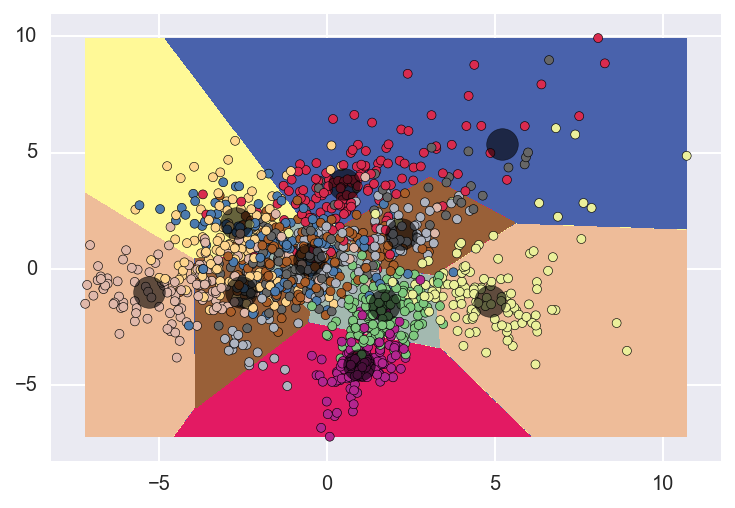

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
clf = KMeans(init="k-means++", n_clusters=10, random_state=42)
clf.fit(reduced_X_train)
centroids = clf.cluster_centers_

xmin, xmax = reduced_X_train[:,0].min(), reduced_X_train[:,0].max()
ymin, ymax = reduced_X_train[:,1].min(), reduced_X_train[:,1].max()
XGrid, YGrid = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                           np.arange(ymin, ymax, (ymax-ymin)/1000))
ZGrid = np.reshape(clf.predict(np.array([XGrid.ravel(), YGrid.ravel()]).T), XGrid.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set1"))
plt.contourf(XGrid, YGrid, ZGrid, cmap=mpl.cm.Accent)
plt.scatter(reduced_X_train[:, 0], reduced_X_train[:, 1], c=y_train, cmap=mpl.cm.Accent)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=1000, color='k', alpha=0.6, zorder=10)
plt.show()

### 6. Find Best Clustering
- 2.3.9.4. Silhouette Coefficient 
- http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py

##### (1) Make Data

In [55]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

In [58]:
# Iris Data
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [59]:
range_n_clusters = [2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.680813620271


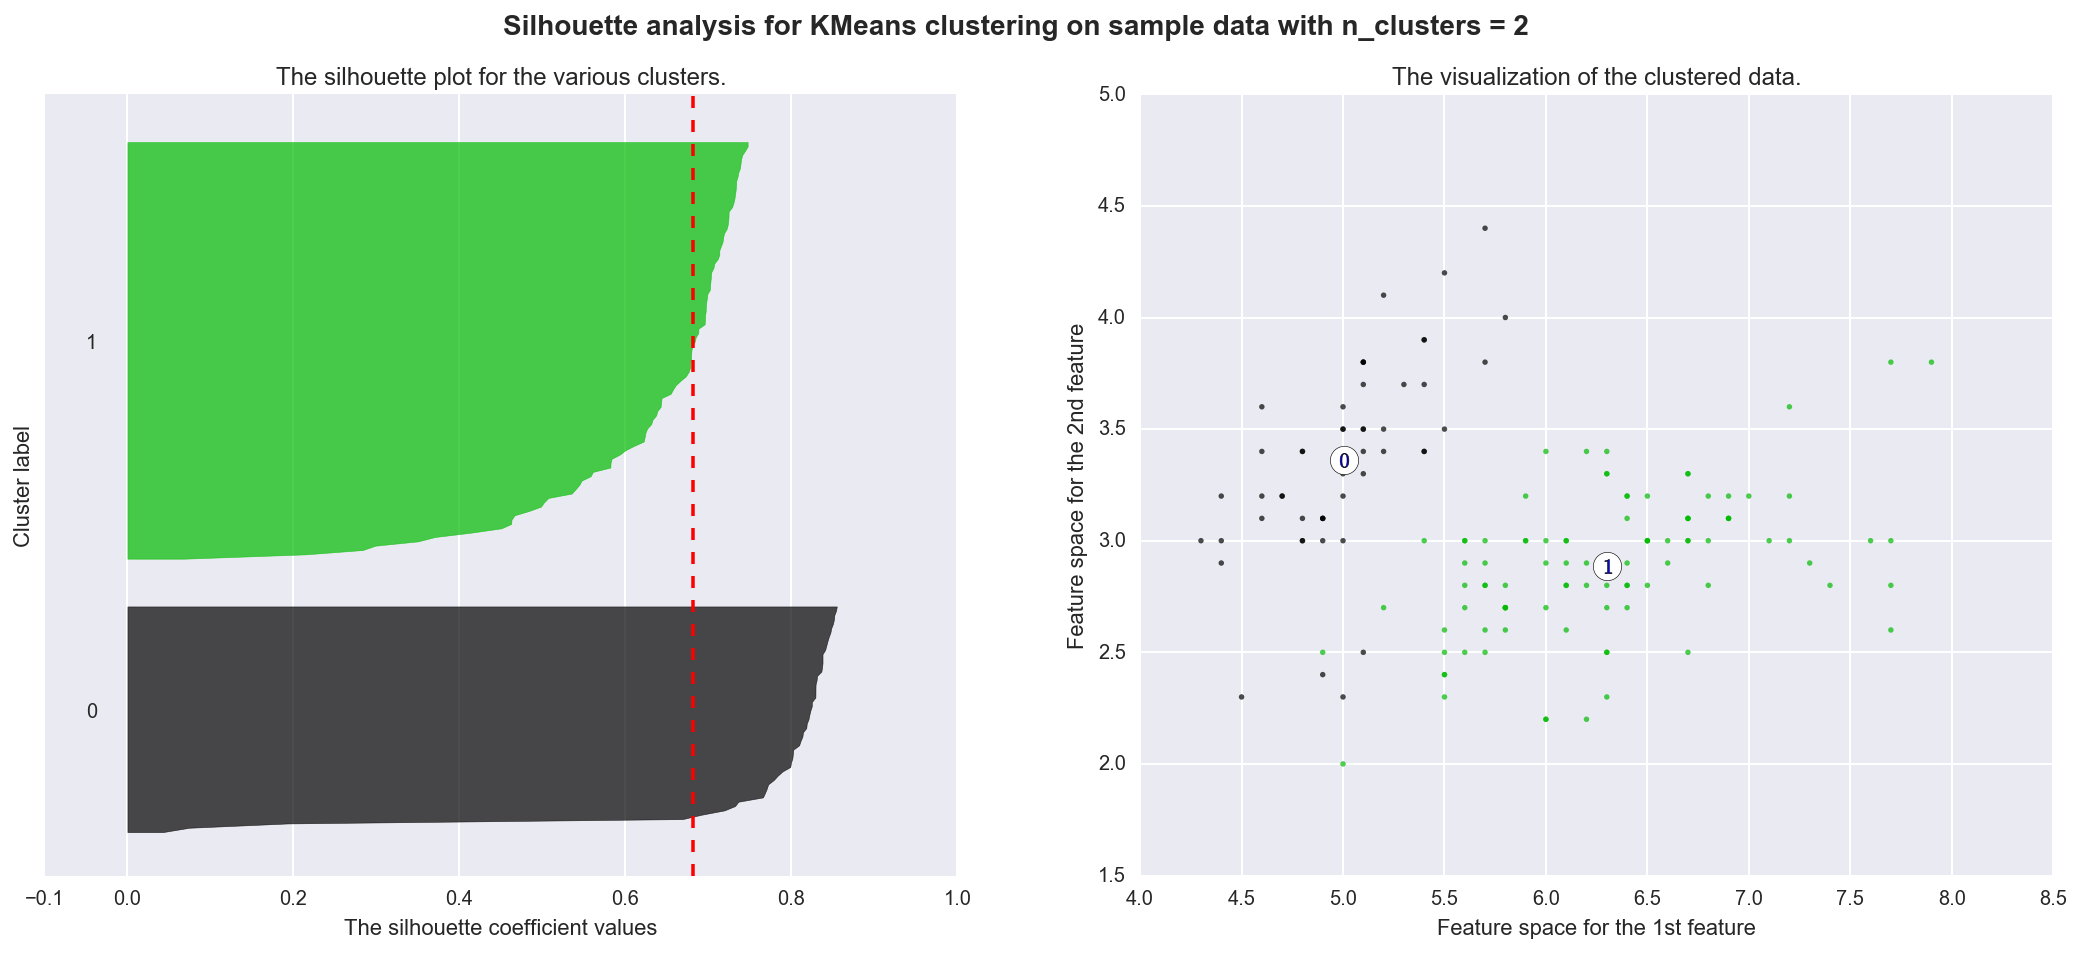

For n_clusters = 3 The average silhouette_score is : 0.552591944521


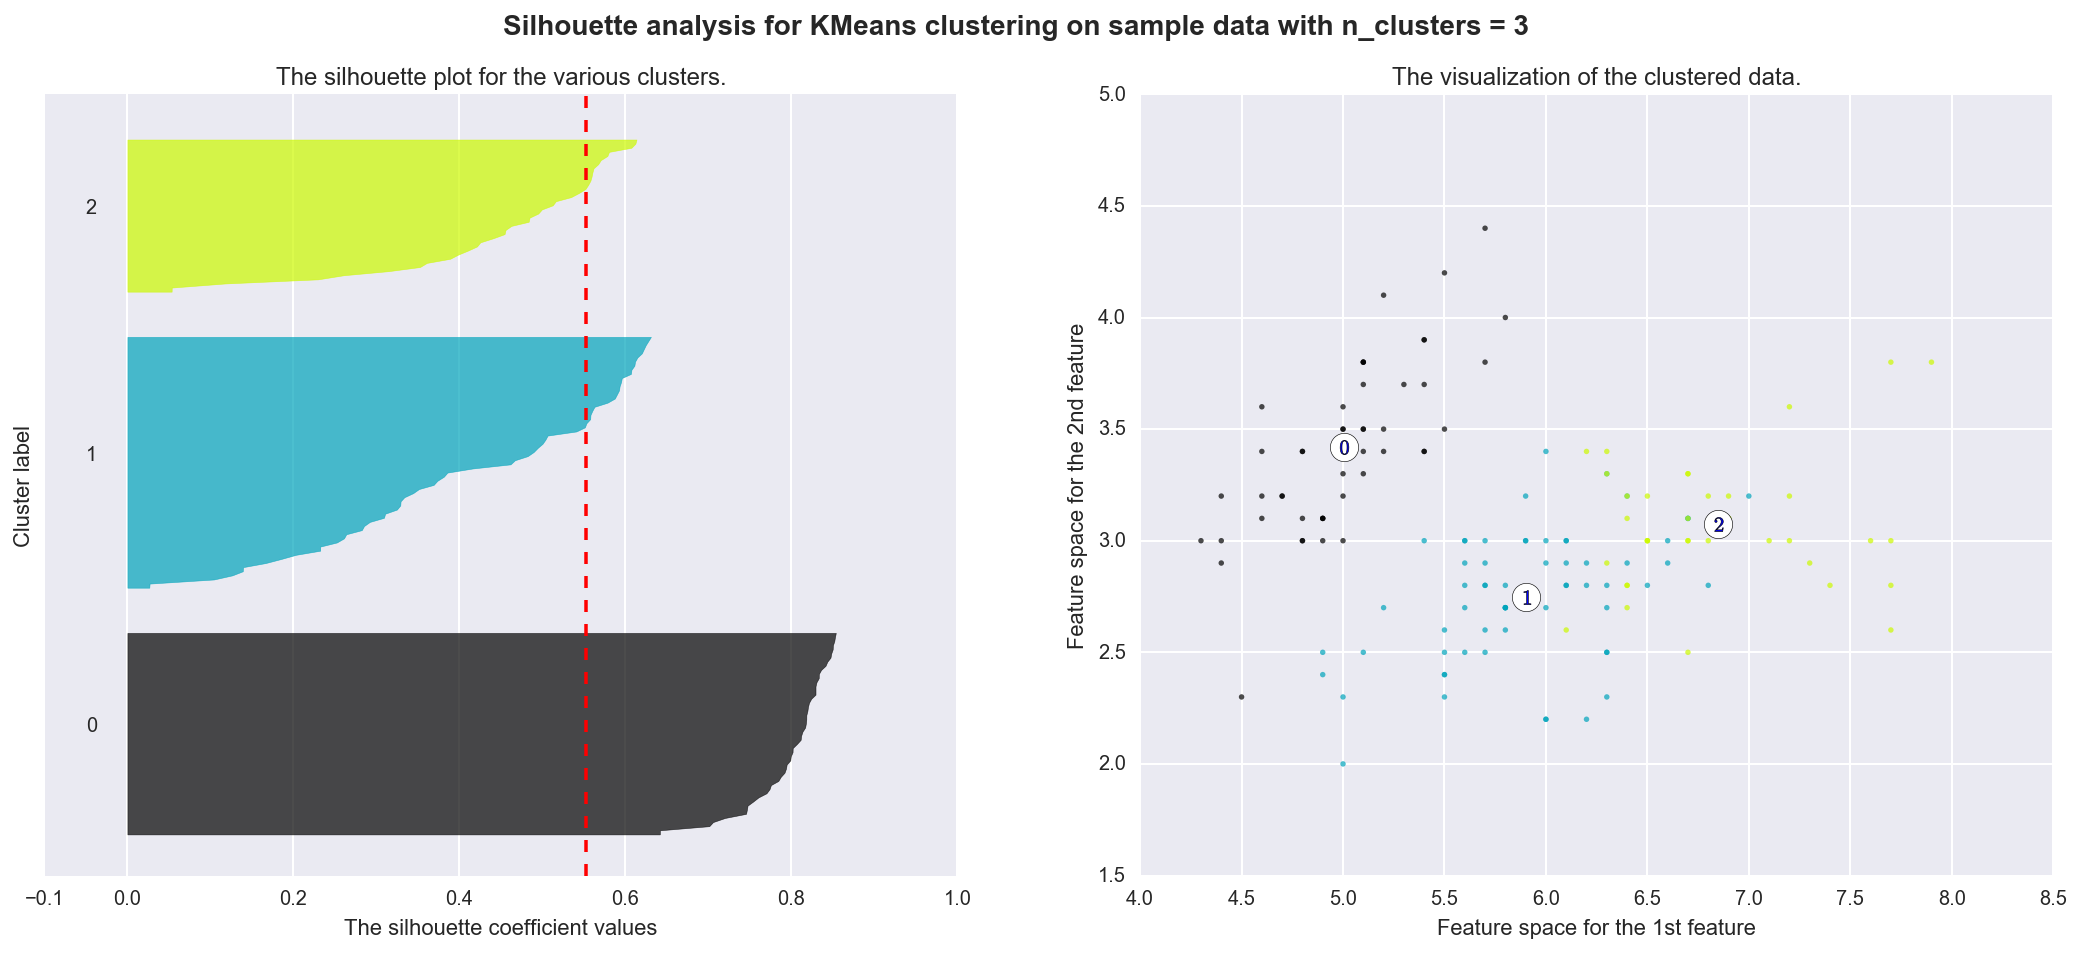

For n_clusters = 4 The average silhouette_score is : 0.497825690075


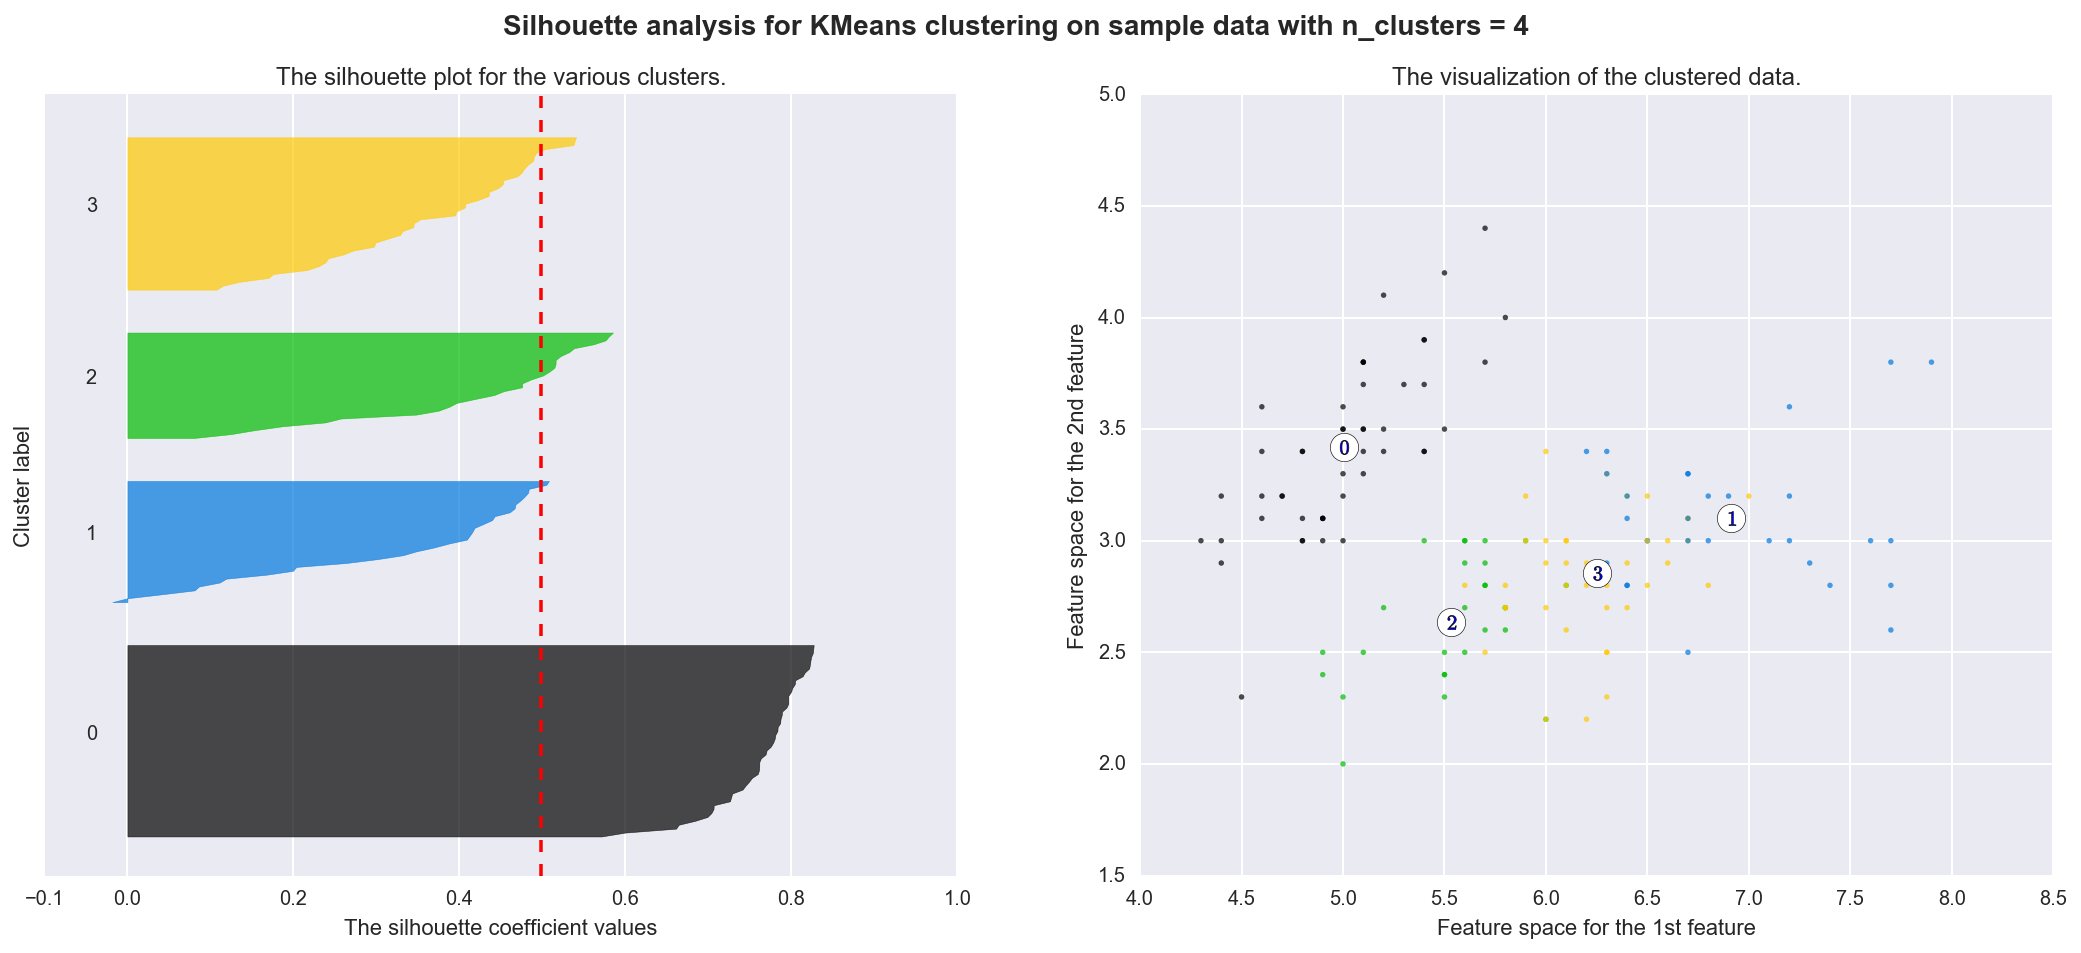

For n_clusters = 5 The average silhouette_score is : 0.488517550854


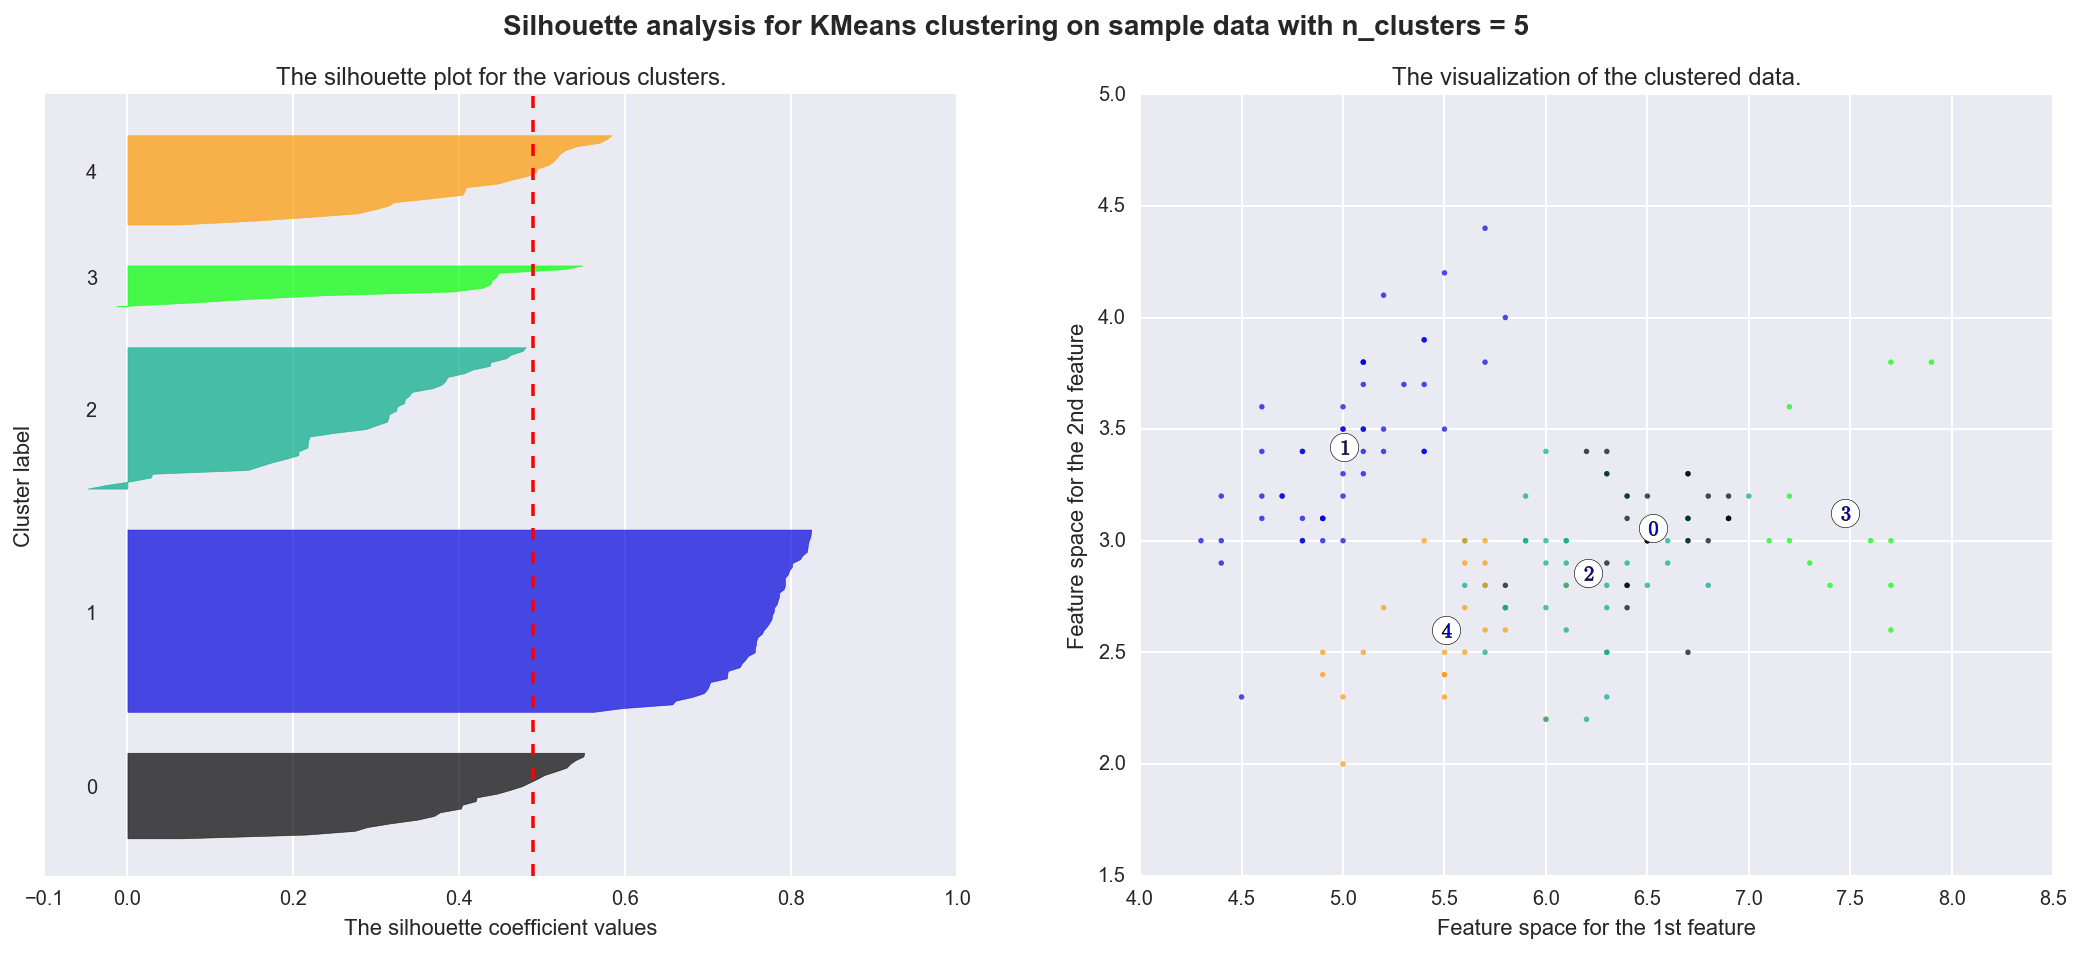

For n_clusters = 6 The average silhouette_score is : 0.371218050256


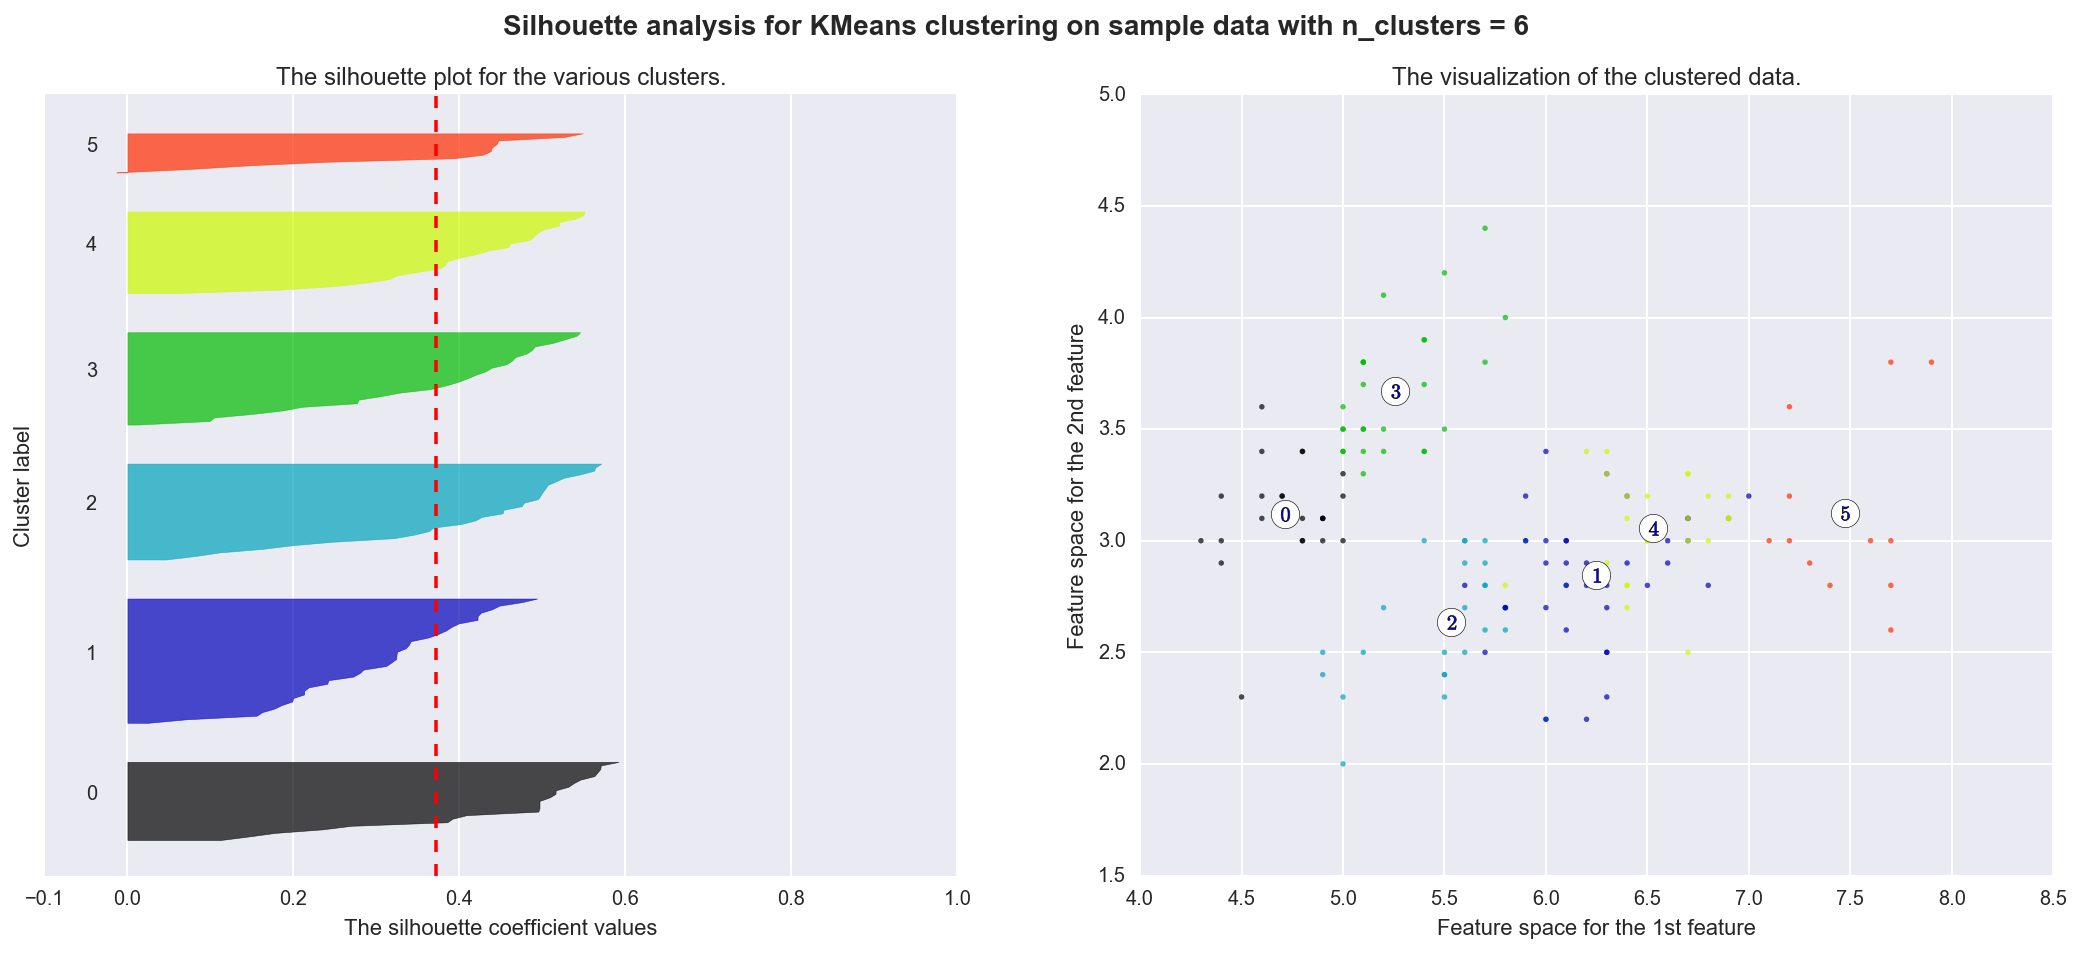

In [60]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors)
                
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()